In [13]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [70]:
base_X = 0
base_Y = -100
ETx = 50*0.000000001
epsilon_amp = 10*0.000000000001
num_clusters = 5
num_nodes = 100
energy = 0.5
packet_bit = 2000
num_rounds = 4000

In [34]:
class Cluster:
    def __init__(self):
        nodes = []
        head = None
        
clusters = [Cluster() for i in range(num_clusters)]

In [35]:
def distance(x_1, x_2, y_1, y_2):
    return (x_1 - x_2)**2 + (y_1 - y_2)**2

In [44]:
class Node:
    def __init__(self, x, y):
        self.X = x
        self.Y = y
        self.energy = energy
        self.die = False
    
    def send(self):
        transmission = ETx * packet_bit
        amplification = epsilon_amp * packet_bit * distance(self.X, base_X, self.Y, base_Y)
        if self.energy < transmission + amplification:
            self.die = True
        else:
            self.energy -= (transmission + amplification)

In [93]:
Xs = uniform.rvs(loc=-50, scale=0, size=num_nodes)
Ys = uniform.rvs(loc=0, scale=50, size=num_nodes)

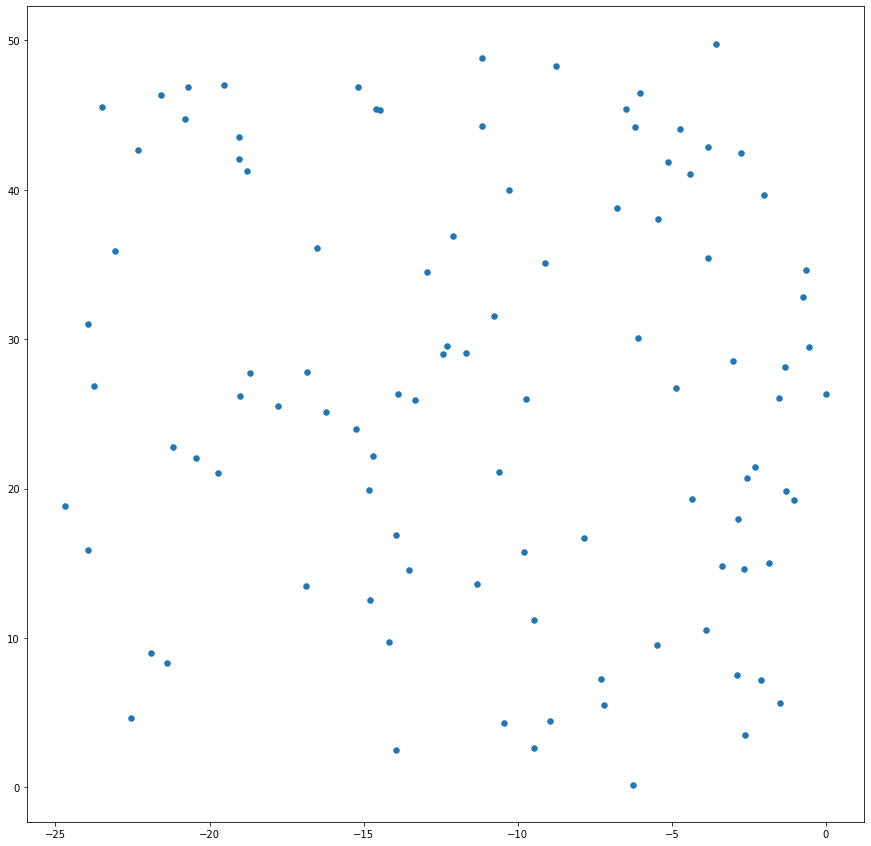

In [94]:
plt.figure(figsize=(15, 15))
plt.scatter(Xs, Ys, s = 30)

In [90]:
Nodes = [None for i in range(num_nodes)]

for i in range(num_nodes):
    Nodes[i] = Node(Xs[i], Ys[i])

dead = []
for i in range(1600):
    for j in range(num_nodes):
        if j not in dead:
            Nodes[j].send()
            if Nodes[j].die:
                dead.append(j)
    if i%100 == 0:
        print(i, len(dead))

0 0
100 0
200 0
300 0
400 0
500 0
600 0
700 0
800 0
900 2
1000 15
1100 29
1200 46
1300 62
1400 74
1500 88


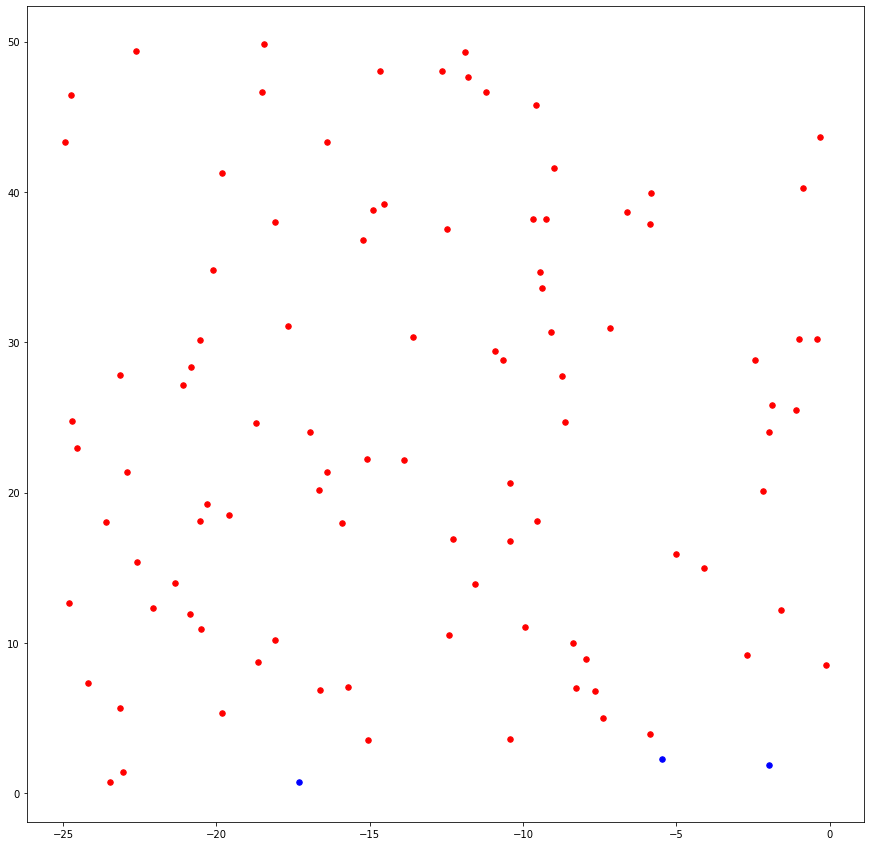

In [91]:
plt.figure(figsize=(15, 15))
dead_X = []
dead_Y = []
undead_X = []
undead_Y = []
for i in range(num_nodes):
    if i in dead:
        dead_X.append(Xs[i])
        dead_Y.append(Ys[i])
    else:
        undead_X.append(Xs[i])
        undead_Y.append(Ys[i])
plt.scatter(dead_X, dead_Y, s = 30, color = 'red')
plt.scatter(undead_X, undead_Y, s = 30, color = 'blue')

In [92]:
print(Xs)

[-10.41701032 -10.92239838  -0.12579919 -16.38319912  -1.98918894
 -11.19154409  -2.68923939  -1.59839185  -5.00051131 -11.79229526
  -0.32050255 -12.41479886  -9.54030028 -14.64870796  -9.57736245
 -23.61123633 -20.5400067  -12.47840141 -20.84764384 -22.60501768
 -14.54178135 -22.58834148 -11.56108343  -9.36888573 -24.79339763
  -5.8505634  -13.60070308  -1.96622111 -20.2949615  -17.2999535
 -24.53529023 -10.65357343  -2.16454573  -5.83726108 -12.64434071
 -15.09380223 -22.90148417  -8.62416283  -6.60112076 -11.8857568
 -23.12654052 -19.81899913  -9.66596154 -18.08322029 -18.51985788
 -24.72144058 -23.04877589  -8.37829791 -15.05943097  -5.85744994
 -24.93600565 -16.65725687  -8.25540361  -0.41075396  -4.10653152
 -15.69399691  -9.25518005 -14.87543172 -16.39009932 -10.41868716
 -13.87109178 -23.13695895 -18.62730096  -9.92665577 -18.09239172
 -24.19812217 -24.7303228  -16.93125972  -0.98671832 -21.08557994
 -18.7203226  -19.8211075   -7.17172067  -8.97988222 -12.28575298
 -23.4637946